<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Claimant_data_Logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/claimants.csv')

In [ ]:
df.shape

(1340, 7)

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [ ]:
mean1=df['CLMSEX'].mean()
mean2=df['CLMINSUR'].mean()
mean3=df['SEATBELT'].mean()
mean4=df['CLMAGE'].mean()

In [ ]:
df['CLMSEX']=df['CLMSEX'].fillna(mean1)
df['CLMINSUR']=df['CLMINSUR'].fillna(mean2)
df['SEATBELT']=df['SEATBELT'].fillna(mean3)
df['CLMAGE']=df['CLMAGE'].fillna(mean4)

In [ ]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
df[df.duplicated()]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS


<ipython-input-38-301ea486f36f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CASENUM'])


<Axes: xlabel='CASENUM', ylabel='Density'>

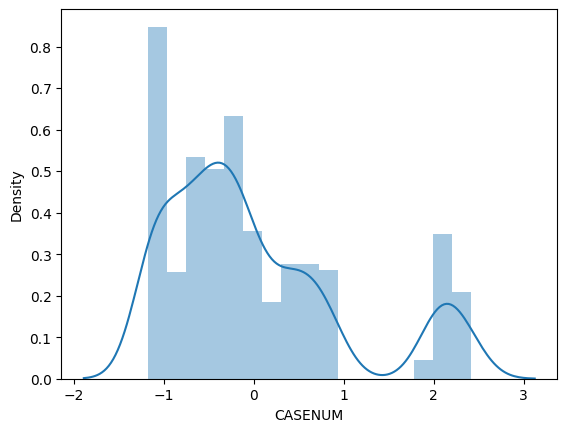

In [ ]:
sns.distplot(df['CASENUM'])

<ipython-input-39-a4aeffa7beae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ATTORNEY'])


<Axes: xlabel='ATTORNEY', ylabel='Density'>

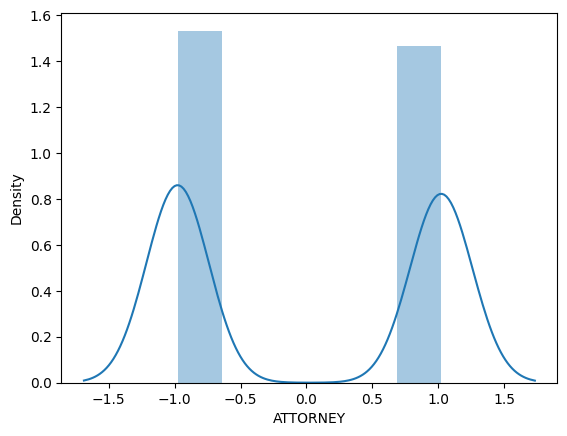

In [ ]:
sns.distplot(df['ATTORNEY'])


<ipython-input-40-d60731c2daf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CLMSEX'])


<Axes: xlabel='CLMSEX', ylabel='Density'>

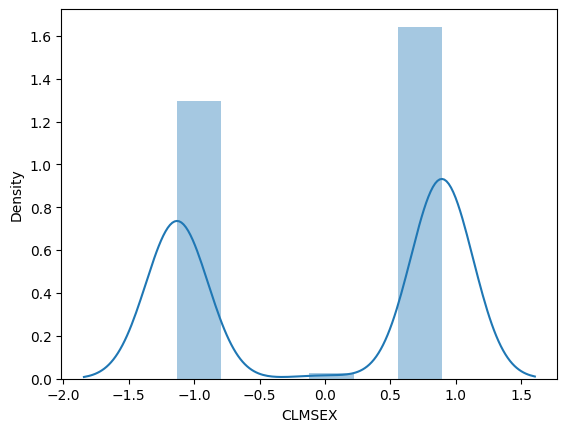

In [ ]:
sns.distplot(df['CLMSEX'])


<ipython-input-41-1fa8cc12eca0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CLMINSUR'])


<Axes: xlabel='CLMINSUR', ylabel='Density'>

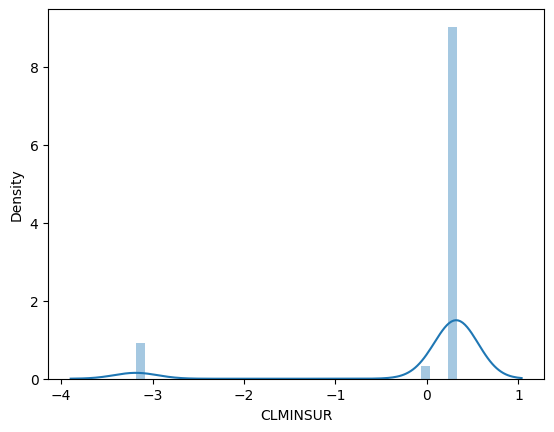

In [ ]:
sns.distplot(df['CLMINSUR'])


<ipython-input-42-5611f34660f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SEATBELT'])


<Axes: xlabel='SEATBELT', ylabel='Density'>

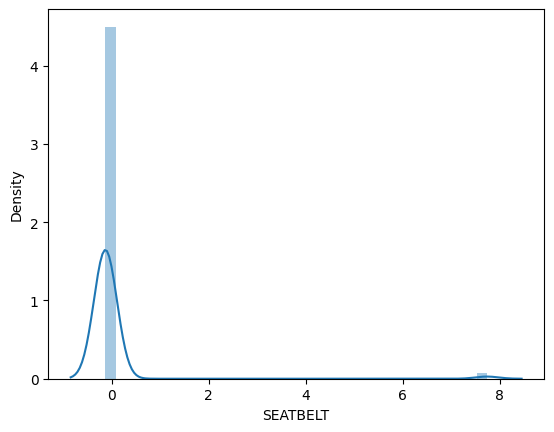

In [ ]:
sns.distplot(df['SEATBELT'])


<ipython-input-43-a1f37c02d839>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CLMAGE'])


<Axes: xlabel='CLMAGE', ylabel='Density'>

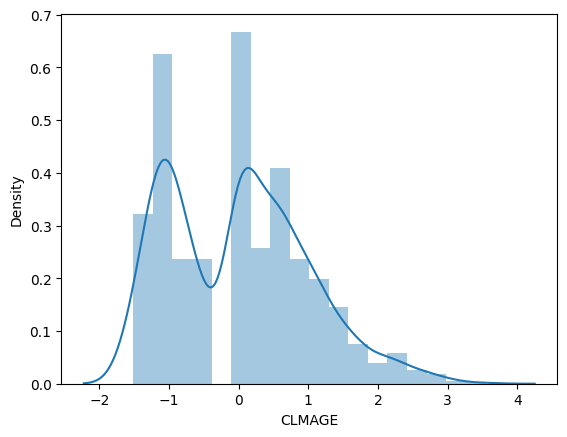

In [ ]:
sns.distplot(df['CLMAGE'])


<ipython-input-44-986626e24b85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LOSS'])


<Axes: xlabel='LOSS', ylabel='Density'>

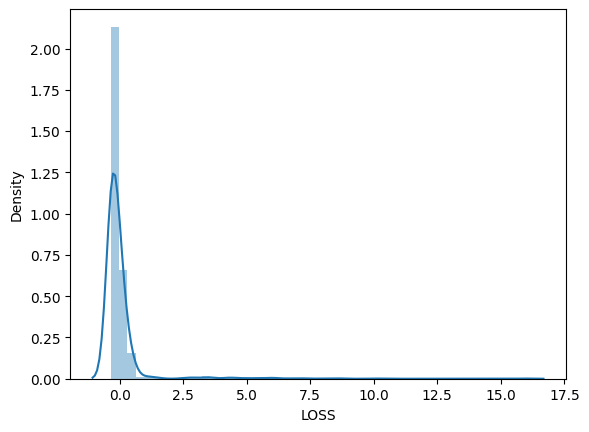

In [ ]:
sns.distplot(df['LOSS'])

<Axes: >

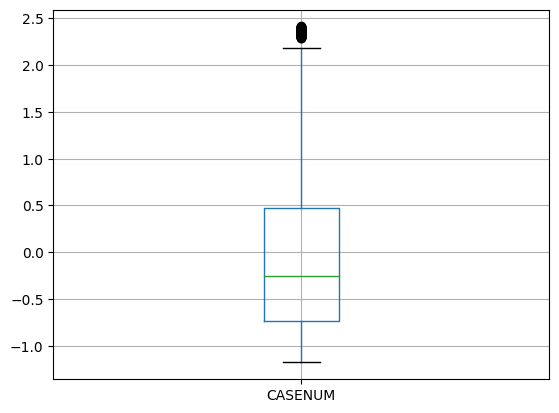

In [ ]:
df.boxplot('CASENUM')

<Axes: >

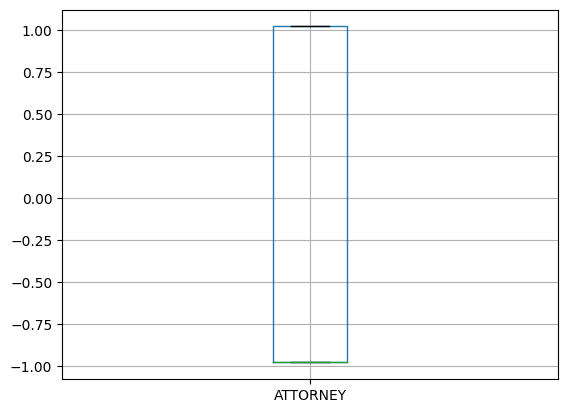

In [ ]:
df.boxplot('ATTORNEY')

<Axes: >

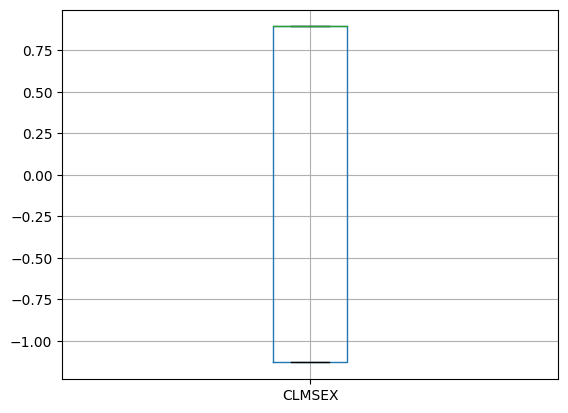

In [ ]:
df.boxplot('CLMSEX')

<Axes: >

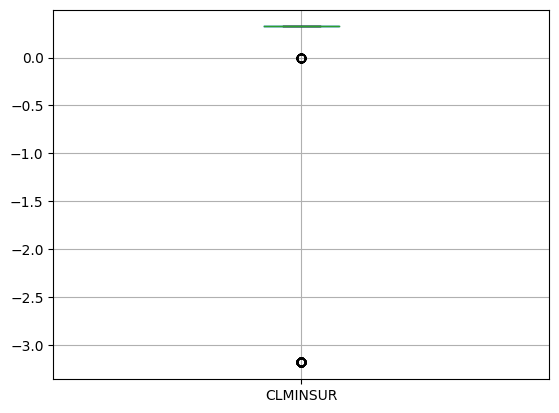

In [ ]:
df.boxplot('CLMINSUR')

<Axes: >

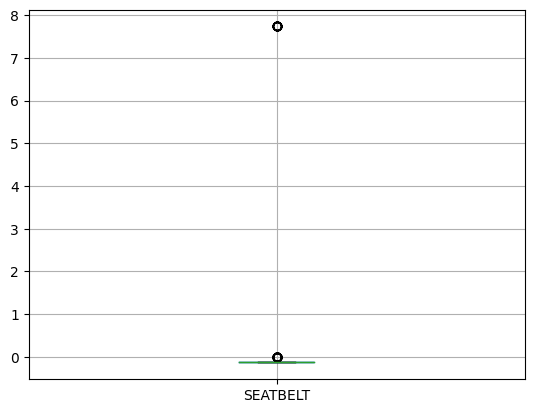

In [ ]:
df.boxplot('SEATBELT')

<Axes: >

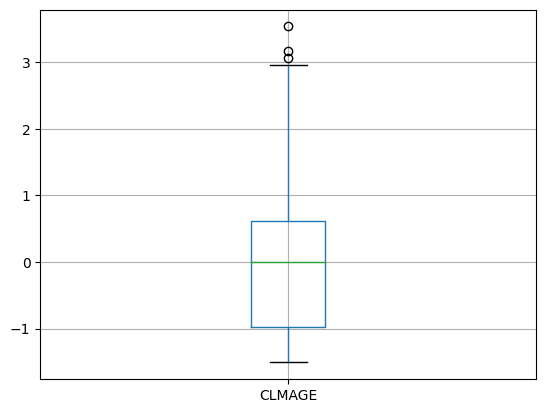

In [ ]:
df.boxplot('CLMAGE')


<Axes: >

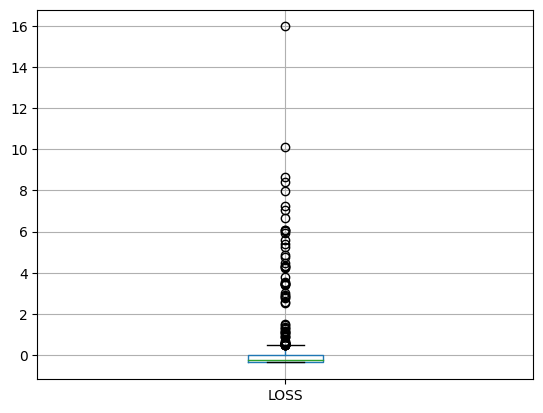

In [ ]:
df.boxplot('LOSS')

In [ ]:
df.drop(['CASENUM'],inplace=True,axis=1)
df.shape

(1340, 6)

In [ ]:
x=df.iloc[:,1:]
y=df['ATTORNEY']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
y_pred_df

,Actual,Predicted
574,0,0
661,1,0
458,0,0
1023,0,0
958,0,0
...,...,...
1111,0,1
1074,0,0
744,0,0
731,0,0


In [ ]:
#confusion matrix for model accuracy
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[87, 55],
       [33, 93]])

In [ ]:
score=((87+87)/(87+55+33+93))*100

In [ ]:
score

64.92537313432835

In [ ]:
#classification report
print(classification_report(y_test,y_pred))

In [ ]:
classifier.predict_proba(x_test)

array([[6.29052551e-01, 3.70947449e-01],
       [7.53712353e-01, 2.46287647e-01],
       [9.99999977e-01, 2.28717625e-08],
       [5.44658133e-01, 4.55341867e-01],
       [6.14659071e-01, 3.85340929e-01],
       [6.50877224e-01, 3.49122776e-01],
       [6.39483963e-01, 3.60516037e-01],
       [3.98819863e-01, 6.01180137e-01],
       [4.85182548e-01, 5.14817452e-01],
       [4.62925784e-01, 5.37074216e-01],
       [9.99937275e-01, 6.27253527e-05],
       [5.71754307e-01, 4.28245693e-01],
       [6.11510759e-01, 3.88489241e-01],
       [6.56913903e-01, 3.43086097e-01],
       [6.44994832e-01, 3.55005168e-01],
       [4.46610050e-01, 5.53389950e-01],
       [3.88587821e-01, 6.11412179e-01],
       [4.14770472e-01, 5.85229528e-01],
       [6.47968716e-01, 3.52031284e-01],
       [3.67286581e-01, 6.32713419e-01],
       [3.81894831e-01, 6.18105169e-01],
       [3.57116845e-01, 6.42883155e-01],
       [9.99002548e-01, 9.97452451e-04],
       [5.02230631e-01, 4.97769369e-01],
       [4.656160

Text(0, 0.5, 'True Positive Rate')

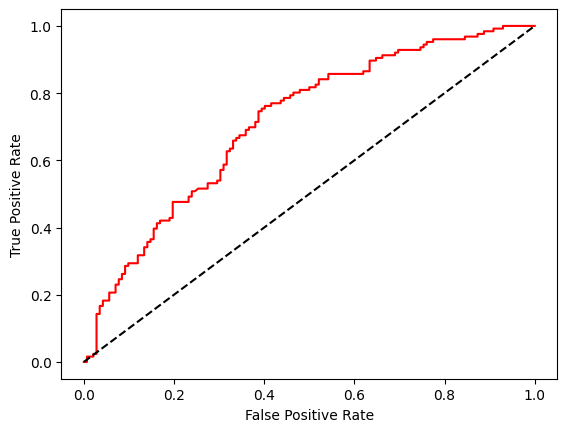

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,classifier.predict_proba(x_test)[:,1])

auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area= %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

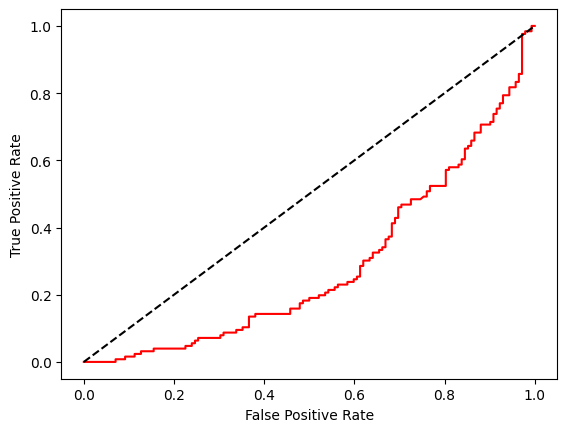

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,classifier.predict_proba(x_test)[:,0])

auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area= %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
auc

0.6753856472166332

In [ ]:
newdata=pd.DataFrame({'CLMSEX':[0],'CLMINSUR':[1],'SEATBELT':[1],'CLMAGE':[45],'LOSS':[42]})

In [ ]:
classifier.predict(newdata)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])